Import the necessary libraries

In [ ]:
import keras
import json
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
import numpy as np
import os

In [ ]:
batch_size        = 64
num_classes       = 10
epochs            = 20
num_predictions   = 20
save_dir          = os.path.join(os.getcwd(), 'drive/My Drive/NEU/7150/HW2/Models/')
model_name        = 'keras_cifar10_trained_model_bn_B64_e30.h5'
history_name      = 'history_keras_cifar10_trained_model_bn_B64_e30.txt'
class_names       = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Load the CIFAR-10 dataset

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train_1 = keras.utils.to_categorical(y_train, num_classes)
y_test_1 = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Build the CNN

In [ ]:
model       = Sequential()
model.name  = 'CNN_BN_B64_E30'

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics= ['accuracy','mse'])

model.summary()

Model: "CNN_BN_B64_E30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)     

In [ ]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

datagen.fit(x_train)

Train the CNN

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train_1,batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test_1),
                    workers=4)

Epoch 1/20
782/782 [==============================] - 258s 330ms/step - loss: 1.4908 - accuracy: 0.4745 - mse: 0.0667 - val_loss: 1.2924 - val_accuracy: 0.5438 - val_mse: 0.0599
Epoch 2/20
782/782 [==============================] - 260s 333ms/step - loss: 1.1903 - accuracy: 0.5781 - mse: 0.0553 - val_loss: 1.1075 - val_accuracy: 0.6101 - val_mse: 0.0514
Epoch 3/20
782/782 [==============================] - 252s 323ms/step - loss: 1.0638 - accuracy: 0.6234 - mse: 0.0500 - val_loss: 1.0241 - val_accuracy: 0.6413 - val_mse: 0.0481
Epoch 4/20
782/782 [==============================] - 255s 326ms/step - loss: 0.9768 - accuracy: 0.6546 - mse: 0.0462 - val_loss: 1.0016 - val_accuracy: 0.6569 - val_mse: 0.0466
Epoch 5/20
782/782 [==============================] - 251s 321ms/step - loss: 0.9017 - accuracy: 0.6824 - mse: 0.0429 - val_loss: 0.9328 - val_accuracy: 0.6773 - val_mse: 0.0441
Epoch 6/20
782/782 [==============================] - 256s 327ms/step - loss: 0.8441 - accuracy: 0.7032 - mse:

Save the trained model for future use

In [ ]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/NEU/7150/HW2/Models/keras_cifar10_trained_model_bn_B64_e30.h5 


In [ ]:
scores = model.evaluate(x_test, y_test_1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.7119586735248565
Test accuracy: 0.7735999822616577


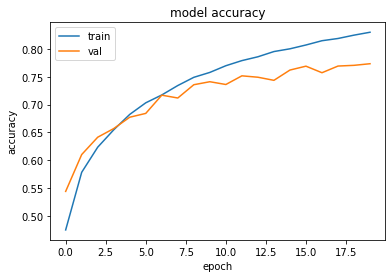

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

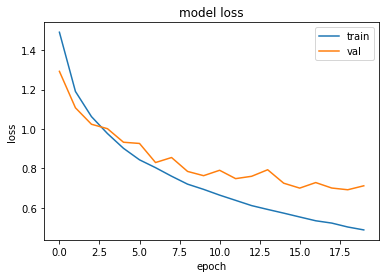

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Save the history for future use

In [ ]:
history_path = os.path.join(save_dir, history_name)

text_file = open(history_path, "w")
text_file.write(str(history.history))
text_file.close()